In [1]:
import pyspark
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sbn
import pandas as pd

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sbn.set(style="whitegrid") # seteando tipo de grid en seaborn

# **Apertura de archivos a usar durante la resolucion del trabajo practico.**

In [2]:
postulaciones_educacion = pd.read_csv('/home/lucas/Documentos/Facultad/OrgaDeDatos/tp_2018/fiuba_1_postulantes_educacion.csv')
postulaciones_genero_edad = pd.read_csv('/home/lucas/Documentos/Facultad/OrgaDeDatos/tp_2018/fiuba_2_postulantes_genero_y_edad.csv')
vistas = pd.read_csv('/home/lucas/Documentos/Facultad/OrgaDeDatos/tp_2018/fiuba_3_vistas.csv')
postulaciones = pd.read_csv('/home/lucas/Documentos/Facultad/OrgaDeDatos/tp_2018/fiuba_4_postulaciones.csv')
avisos_online = pd.read_csv('/home/lucas/Documentos/Facultad/OrgaDeDatos/tp_2018/fiuba_5_avisos_online.csv')
avisos_detalle = pd.read_csv('/home/lucas/Documentos/Facultad/OrgaDeDatos/tp_2018/fiuba_6_avisos_detalle.csv')

# Chequeo elementos nulos es los archivos

In [5]:
postulaciones_educacion.isnull().any()

idaviso             False
idpostulante        False
fechapostulacion    False
dtype: bool

In [6]:
postulaciones_genero_edad.isnull().any()

idpostulante    False
nombre          False
estado          False
dtype: bool

In [7]:
vistas.isnull().any()

idAviso         False
timestamp       False
idpostulante    False
dtype: bool

In [8]:
avisos_online.isnull().any()

idaviso    False
dtype: bool

In [9]:
avisos_detalle.isnull().any()

idaviso                 False
idpais                  False
titulo                  False
descripcion             False
nombre_zona             False
ciudad                   True
mapacalle                True
tipo_de_trabajo         False
nivel_laboral           False
nombre_area             False
denominacion_empresa     True
dtype: bool

In [10]:
postulaciones.isnull().any()

idaviso             False
idpostulante        False
fechapostulacion    False
dtype: bool

In [4]:
#Creo una columna para poder utilizar la fecha mas comodamente
#Datos solo de enero y febrero
postulaciones['date'] = pd.to_datetime(postulaciones['fechapostulacion']).dt.date

postulaciones.head()

,idaviso,idpostulante,fechapostulacion,date
0,1112257047,NM5M,2018-01-15 16:22:34,2018-01-15
1,1111920714,NM5M,2018-02-06 09:04:50,2018-02-06
2,1112346945,NM5M,2018-02-22 09:04:47,2018-02-22
3,1112345547,NM5M,2018-02-22 09:04:59,2018-02-22
4,1112237522,5awk,2018-01-25 18:55:03,2018-01-25


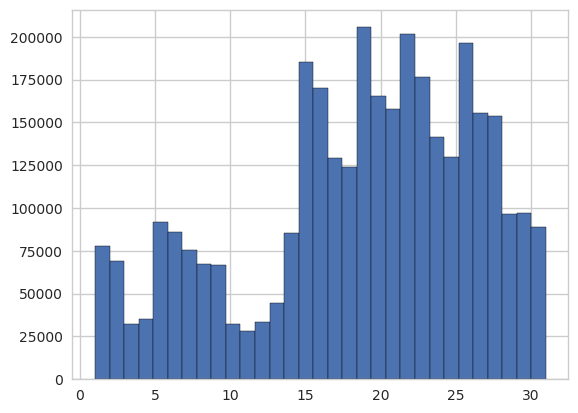

In [5]:
#Dsitricucion de las postulaciones por dia de la semana
pd.to_datetime(postulaciones['date']).dt.day.hist(bins=31,edgecolor='black');

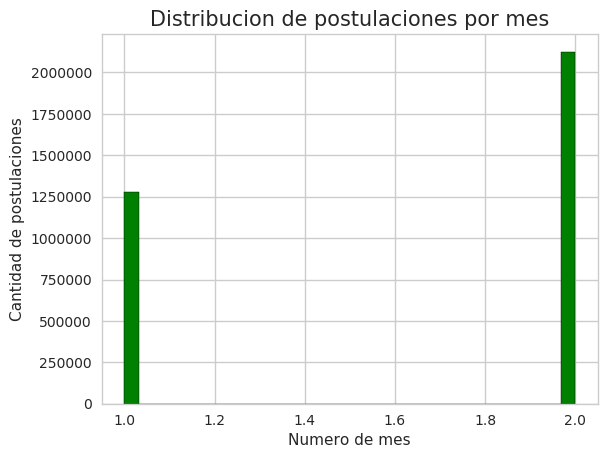

In [7]:
#Districucion de las postulaciones por mes
g_month = pd.to_datetime(postulaciones['date']).dt.month.hist(color='green',bins=31,edgecolor='black');
g_month.set_title('Distribucion de postulaciones por mes',fontsize=15)
g_month.set_xlabel('Numero de mes')
g_month.set_ylabel('Cantidad de postulaciones');

In [13]:
#Dsitricucion de las postulaciones por dia en enero
g_enero = (postulaciones.loc[pd.to_datetime(postulaciones['date'].dt.month) == '01',pd.to_datetime(postulaciones['date'].dt.day)]).hist(color='red',edgecolor='black');
g_enero.set_title('Distribucion de postulaciones por usuario',fontsize=15)
g_enero.set_xlabel('Id de usuario')
g_enero.set_ylabel('Cantidad de postulaciones')

AttributeError: Can only use .dt accessor with datetimelike values

In [38]:
postulaciones_genero_edad['fechanacimiento'] = pd.to_datetime(postulaciones_genero_edad['fechanacimiento'])
#postulaciones_genero_edad['year'] = pd.to_datetime(postulaciones_genero_edad['fechanacimiento']).dt.year
#postulaciones_genero_edad['day'] = pd.to_datetime(postulaciones_genero_edad['fechanacimiento']).dt.day
#postulaciones_genero_edad['month'] = pd.to_datetime(postulaciones_genero_edad['fechanacimiento']).dt.month

postulaciones_genero_edad.head()


OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 31-12-11 00:00:00